# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [20]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [21]:
train, test = keras.datasets.cifar10.load_data()

In [22]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [23]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
def build_mlp(input_shape,output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [25]:
## 超參數設定
"""
Set your required experiment parameters
"""
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
optimizers =['SGD','RMSprop','AdaGrad','Adam']


In [26]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for optimizer in optimizers:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with {optimizer}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    if optimizer == 'SGD':
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    elif optimizer == 'RMSprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=LEARNING_RATE)
    elif optimizer == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad(learning_rate=LEARNING_RATE)
    elif optimizer == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad(learning_rate=LEARNING_RATE)
    elif optimizer == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"optimizer:{optimizer}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

50000/50000 [==============================] - 4s 89us/step - loss: 0.3919 - accuracy: 0.8607 - val_loss: 2.2241 - val_accuracy: 0.5333
Epoch 50/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.3766 - accuracy: 0.8640 - val_loss: 2.3027 - val_accuracy: 0.5197
Experiment with RMSprop
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense) 

50000/50000 [==============================] - 5s 101us/step - loss: 1.7473 - accuracy: 0.3695 - val_loss: 1.8043 - val_accuracy: 0.3523
Epoch 48/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7500 - accuracy: 0.3684 - val_loss: 1.8440 - val_accuracy: 0.3270
Epoch 49/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7499 - accuracy: 0.3703 - val_loss: 1.8052 - val_accuracy: 0.3514
Epoch 50/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7432 - accuracy: 0.3697 - val_loss: 2.0495 - val_accuracy: 0.3130
Experiment with AdaGrad
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_____________________________________________

Epoch 45/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.0911 - accuracy: 0.6173 - val_loss: 1.3784 - val_accuracy: 0.5192
Epoch 46/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.0796 - accuracy: 0.6231 - val_loss: 1.5059 - val_accuracy: 0.4911
Epoch 47/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.0736 - accuracy: 0.6236 - val_loss: 1.4064 - val_accuracy: 0.5124
Epoch 48/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.0693 - accuracy: 0.6235 - val_loss: 1.3873 - val_accuracy: 0.5200
Epoch 49/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.0600 - accuracy: 0.6290 - val_loss: 1.3884 - val_accuracy: 0.5154
Epoch 50/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.0527 - accuracy: 0.6329 - val_loss: 1.4568 - val_accuracy: 0.4974
Experiment with Adam
Model: "model_1"
_________________________________________________________________
Layer (t

Epoch 43/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5202 - accuracy: 0.4528 - val_loss: 1.5986 - val_accuracy: 0.4227
Epoch 44/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5305 - accuracy: 0.4501 - val_loss: 1.6185 - val_accuracy: 0.4220
Epoch 45/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5350 - accuracy: 0.4478 - val_loss: 1.6815 - val_accuracy: 0.4075
Epoch 46/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5349 - accuracy: 0.4477 - val_loss: 1.6698 - val_accuracy: 0.4036
Epoch 47/50
50000/50000 [==============================] - 55s 1ms/step - loss: 1.5263 - accuracy: 0.4520 - val_loss: 1.6215 - val_accuracy: 0.4300
Epoch 48/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5248 - accuracy: 0.4543 - val_loss: 1.6888 - val_accuracy: 0.3965
Epoch 49/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.5203 - accuracy: 0.4530 

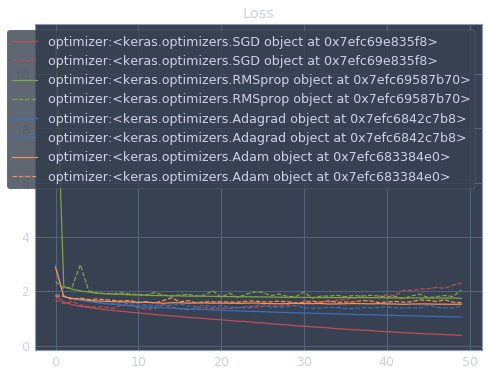

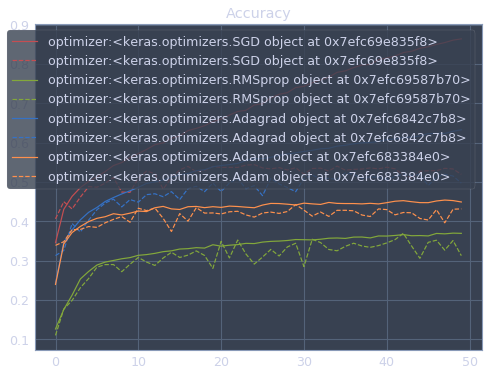

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [28]:
! jupyter nbconvert --to html Day_080_HW.ipynb

[NbConvertApp] Converting notebook Day_080_HW.ipynb to html
[NbConvertApp] Writing 625141 bytes to Day_080_HW.html
